## OASIS INFOBYTE  -  INTERNSHIP
## TASK 5 - SALES PREDICTION USING PYTHON

### Description:
Sales prediction means predicting how much of a product people will buy based on factors such as the amount you spend to advertise your product, the segment of people you advertise for, or the platform you are advertising on about your product.

Typically, a product and service-based business always need their Data Scientist to predict their future sales with every step they take to manipulate the cost of advertising their product. So let's start the task of sales prediction with machine learning using Python.

Types of media given: 

    1. Television
    2. Radio
    3. Newspaper

## OBJECTIVE: 

Build a predictive machine learning model that can learn from the measurements of the iris species and classify them using data science techniques in Python.


Process :-

    1.Reading and Understanding Data
    2.Extrapolatory Data Analysis
    3.Data Preparation
    4.Building Model and testing
    5.Inference 


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# Step 1- Reading and Understanding Data

In [1]:
# import required libraries for dataframe and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
## Loading the required dataset (Iris Dataset)
adv_df = pd.read_csv('D:/DATA/Oasis Infobyte/Task 5 - advertising/Advertising.csv')
adv_df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
# shape
print("Advertising Dataset Size  :" ,adv_df.size)
print("Advertising Dataset Shape :" ,adv_df.shape)

Advertising Dataset Size  : 1000
Advertising Dataset Shape : (200, 5)


In [4]:
adv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


No null values and all data is matching its data type

In [5]:
# Dropping the Id column as it has no significance here
adv_df=adv_df.drop("Unnamed: 0",axis=1)
adv_df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


======================================================================================================================================================

## Step -2 - Extrapolatory Data Analysis

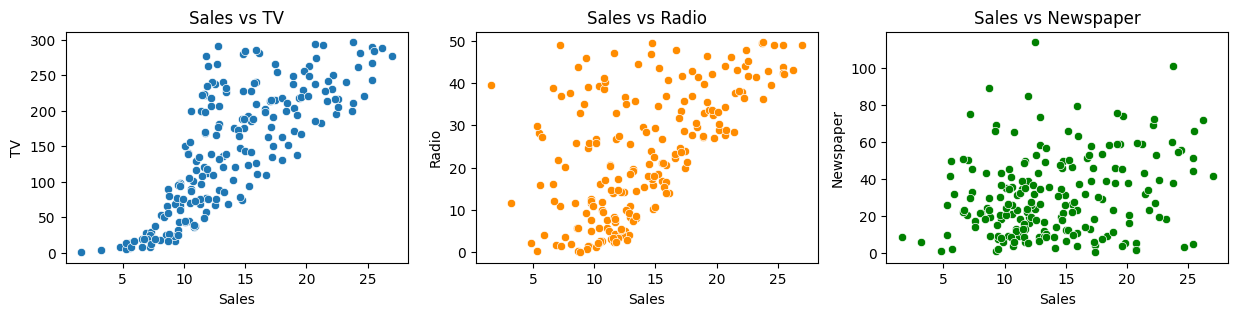

In [6]:
# Create a scatter plot

plt.figure(figsize=(15,3))

plt.subplot(1,3,1)
sns.scatterplot(x='Sales', y='TV', data=adv_df)
plt.title('Sales vs TV')
plt.xlabel('Sales')
plt.ylabel('TV')


plt.subplot(1,3,2)
sns.scatterplot(x='Sales', y='Radio', data=adv_df, color = 'darkorange')
plt.title('Sales vs Radio')
plt.xlabel('Sales')
plt.ylabel('Radio')

plt.subplot(1,3,3)
sns.scatterplot(x='Sales', y='Newspaper', data=adv_df, color = 'green')
plt.title('Sales vs Newspaper')
plt.xlabel('Sales')
plt.ylabel('Newspaper')

sns.set_palette('deep')

plt.show()

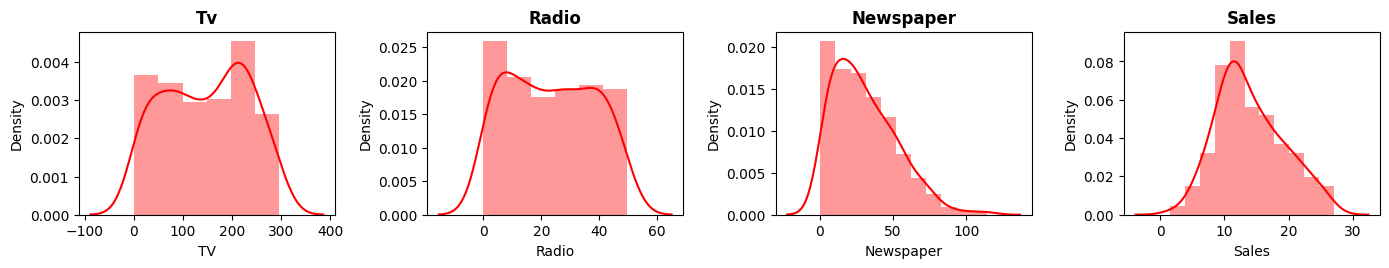

In [7]:
# Visualizing the distribution

plt.figure(figsize=(14,12))
for n,column in enumerate(adv_df):
  plt.subplot(5, 4, n+1)
  sns.distplot(adv_df[column], color = 'r')
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

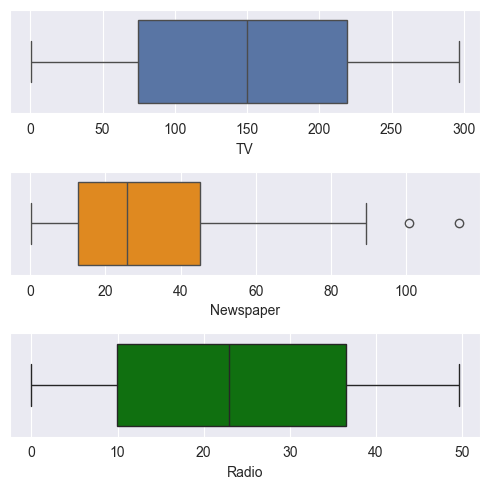

In [8]:
# box plot
sns.set_style('darkgrid')

fig, axs = plt.subplots(3, figsize=(5,5))

plt1 = sns.boxplot(x=adv_df['TV'], ax=axs[0])
plt2 = sns.boxplot(x=adv_df['Newspaper'], ax=axs[1], color = 'darkorange')
plt3 = sns.boxplot(x=adv_df['Radio'], ax=axs[2], color = 'green')
plt.tight_layout()
plt.show()

In [9]:
adv_df1 = adv_df.drop(['Sales'],axis=1)
adv_df1.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


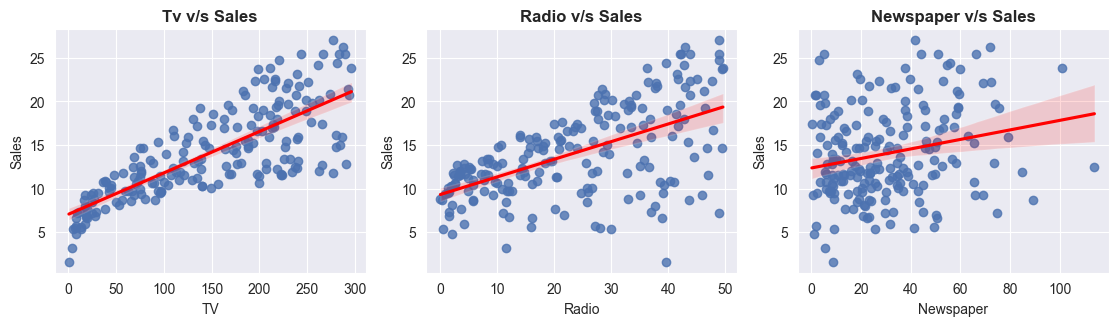

In [10]:
# Checking Linearity
independent_variables = [i for i in adv_df.columns if i not in ['Sales']]

plt.figure(figsize=(15,15))
for n,column in enumerate(adv_df1.columns ):
  plt.subplot(5, 4, n+1)
  sns.regplot(x = adv_df1[column], y = adv_df['Sales'],line_kws={"color": "red"})
  plt.title(f'{column.title()} v/s Sales',weight='bold')
  plt.tight_layout()

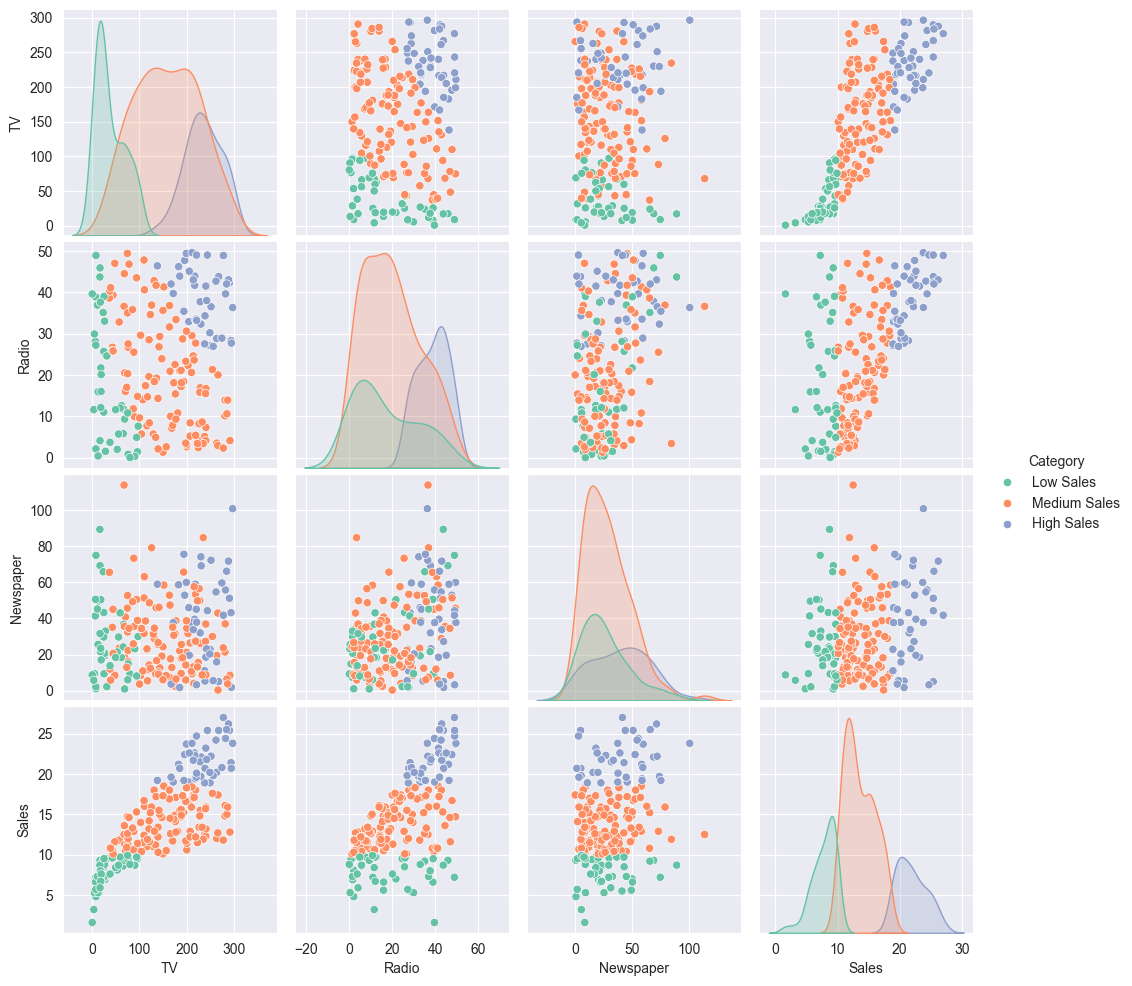

In [11]:
# creating a pair plot
adv_df2 = adv_df.copy()
adv_df2['Category'] = pd.cut(adv_df2['Sales'], bins=3, labels=['Low Sales', 'Medium Sales', 'High Sales'])

sns.pairplot(adv_df2, hue='Category', palette='Set2')  
plt.show()

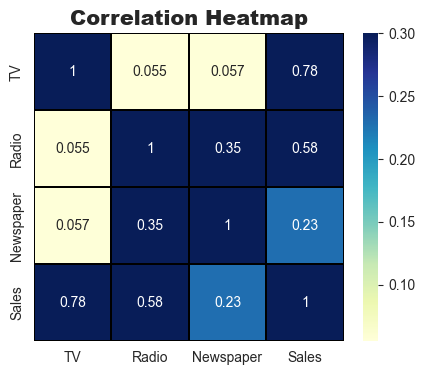

In [12]:
# Checking corelations
plt.figure(figsize=(5,4))

plot=sns.heatmap(abs(adv_df.corr()), vmax=.3, linewidths=0.01, annot=True, cmap='YlGnBu', linecolor="black")
plot.set_xticklabels(plot.get_xticklabels())
plot.set_title("Correlation Heatmap", size = 15, weight = 'heavy')
plt.show()


======================================================================================================================================================

## Step -3 - Data Preparation

In [13]:
# the correlation matrix
adv_df1.corr()

,TV,Radio,Newspaper
TV,1.000000,0.054809,0.056648
Radio,0.054809,1.000000,0.354104
Newspaper,0.056648,0.354104,1.000000


======================================================================================================================================================

## Step -4 - Model Building

In [19]:
#Importing libraries for model building
import math
from scipy import stats

from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler,PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression ,Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn import ensemble

In [15]:
adv_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [16]:
X = adv_df.iloc[:, 0:3]
Y = adv_df.iloc[:, -1]

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 2)

In [21]:
def evaluate_model(true, predicted):
    MAE = mean_absolute_error(true, predicted)
    MSE = mean_squared_error(true, predicted)
    RMSE = np.sqrt(mean_squared_error(true, predicted))
    R2_square = r2_score(true, predicted)
    return MAE, MSE, RMSE, R2_square

In [22]:
models = {"Linear Regression": LinearRegression(),
           "Lasso Regression": Lasso(),
           "Ridge Regression": Ridge(),
              "Decision Tree": DecisionTreeRegressor(),
     "K-Neighbors Regressor": KNeighborsRegressor(),
   "Random Forest Regressor": RandomForestRegressor(),
  }

results = {}
for model_name, model in models.items():
    model.fit(X_train, Y_train) 

    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    
    model_train_MAE , model_train_MSE, model_train_RMSE, model_train_R2 = evaluate_model(Y_train, Y_train_pred)

    model_test_MAE , model_test_MSE, model_test_RMSE, model_test_R2 = evaluate_model(Y_test, Y_test_pred)
    
    results[model_name] = {
        'Train': {
            'MAE': model_train_MAE,
            'MSE' : model_train_MSE,
            'RMSE': model_train_RMSE,
            'R2 Score': model_train_R2,
        },
        'Test': {
            'MAE': model_test_MAE,
            'MSE' : model_test_MSE,
            'RMSE': model_test_RMSE,
            'R2 Score': model_test_R2,
        },
    }

## Step -5 - Inference

In [23]:
# Initialize an empty list to store the data
data_list = []

for model_name, model_results in results.items():
    data_list.append({
        'Model': model_name,
        'MAE': model_results['Test']['MAE'],
        'MSE': model_results['Test']['MSE'],
        'RMSE': model_results['Test']['RMSE'],
        'R2 Score': model_results['Test']['R2 Score']
    })

# Create a DataFrame from the list
scores_df = pd.DataFrame(data_list)
scores_df

,Model,MAE,MSE,RMSE,R2 Score
0,Linear Regression,1.646275,4.503126,2.122057,0.757589
1,Lasso Regression,1.657856,4.603654,2.145613,0.752178
2,Ridge Regression,1.646306,4.503305,2.122099,0.757580
3,Decision Tree,0.682500,0.815250,0.902912,0.956114
4,K-Neighbors Regressor,1.509000,4.061600,2.015341,0.781358
5,Random Forest Regressor,0.572375,0.484024,0.695718,0.973944


These metrics provide a comprehensive view of the performance of each model. In general, lower values for MAE, MSE, and RMSE are better, indicating smaller errors.

Additionally, a higher R2 Score is desirable as it represents the proportion of the variance in the dependent variable that is predictable from the independent variables.

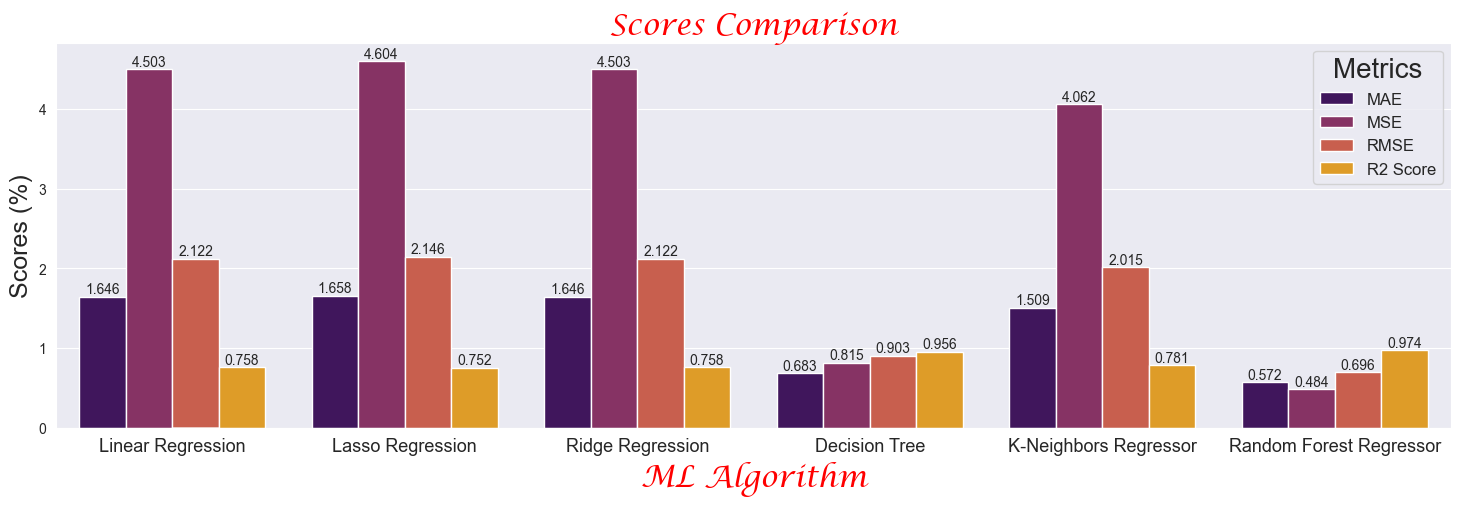

In [24]:
plt.figure(figsize=(18, 5))

# Melt the DataFrame for easier plotting
melted_data = pd.melt(scores_df, id_vars='Model', var_name='Variable', value_name='Score')


# Plotting code using Seaborn
ax = sns.barplot(x= 'Model', y='Score', hue='Variable', data=melted_data, palette='inferno')

bar_width = 0.2
for bar in ax.patches:
    bar.set_width(bar_width)

for container in ax.containers:
    ax.bar_label(container, fmt='%.3f')  


# Customize the plot
plt.title('Scores Comparison', color='Red', font='Lucida Calligraphy', fontsize=21)
plt.xlabel('ML Algorithm',color='Red',font='Lucida Calligraphy', fontsize=21)
plt.xticks(fontsize =13)
plt.ylabel('Scores (%)', fontsize=18)
plt.legend(title='Metrics', title_fontsize='20', fontsize='12')

# Show the plot
plt.show()

From the provided metrics, it seems like the Random Forest Regressor performed the best among the models, as it has the lowest values for MAE, MSE, and RMSE, and a high R2 Score of 0.974.

 The Decision Tree also performed well with high R2 Score (0.956).

In [25]:
import statsmodels.api as sm

In [26]:
X_sm = sm.add_constant(X)
ols_model = sm.OLS(Y, X_sm).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 15 Dec 2023   Prob (F-statistic):           1.58e-96
Time:                        00:43:03   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###  USING RANDOM FOREST TO CALCULATE COEFFICIENTS

In [27]:
RFR = RandomForestRegressor()

In [28]:
RFR.fit(X_train,Y_train)

RandomForestRegressor()

In [29]:
importances = RFR.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importance
feature_importance_df


,Feature,Importance
0,TV,0.698168
1,Radio,0.293223
2,Newspaper,0.008609


#### Types of media given: 

    1. Television - This feature has the highest importance with a value of approximately 0.698. It suggests that the "TV" feature contributes significantly to the model's predictions.
    2. Radio      - The "Radio" feature has the second-highest importance with a value of around 0.293. It indicates that "Radio" also plays a significant role in the model's predictions.
    3. Newspaper  - The "Newspaper" feature has the lowest importance among the three, with a value of approximately 0.008.
    
    This suggests that, in this particular model, "Newspaper" has a relatively minor impact on predictions compared to "TV" and "Radio."

======================================================================================================================================================

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png) 